In [1]:
%matplotlib qt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import tables
from phd.utils.convertor_tools import direction_to_degree
from scipy.interpolate import UnivariateSpline

In [1]:
import sys
sys.path

['/home/zelenyy/npm/phd/phd-code/notebooks',
 '/home/zelenyy/ROOT/ROOT6_install/lib',
 '/home/zelenyy/miniconda3/lib/python37.zip',
 '/home/zelenyy/miniconda3/lib/python3.7',
 '/home/zelenyy/miniconda3/lib/python3.7/lib-dynload',
 '',
 '/home/zelenyy/.local/lib/python3.7/site-packages',
 '/home/zelenyy/npm/dataforge/dataforge-python',
 '/home/zelenyy/miniconda3/lib/python3.7/site-packages',
 '/home/zelenyy/npm/git/nist-calculator',
 '/home/zelenyy/npm/phd/phd-code/python',
 '/home/zelenyy/.local/lib/python3.7/site-packages/IPython/extensions',
 '/home/zelenyy/.ipython']

In [3]:
path = "/home/zelenyy/data/thunderstorm/result.hdf5"

In [8]:
with tables.open_file(path) as h5file:
        table = h5file.get_node("/run/particle_detector_electron")
        print(repr(table.attrs))

NoSuchNodeError: group ``/`` does not have a child named ``/run/particle_detector_electron``

In [5]:
def process(path):
    probability = []
    energy = []
    theta = []
    with tables.open_file(path) as h5file:
        for group in h5file.root:
            table = h5file.get_node(group, "particle_detector_number")
            data = table.read()
            indx = data['electron'] == 0
            probability.append(np.sum(indx)/table.attrs["values_number"])
            energy.append(table.attrs["values_energy"])
            theta.append(direction_to_degree(table.attrs["values_direction"]))
    return theta, energy, probability
        
        # plt.hist(data["energy"])

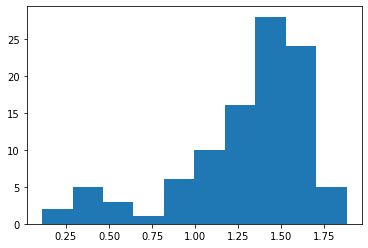

In [5]:
process(path)

In [10]:
process(path)

0.12


In [9]:

path = "/mnt/storage2/phd/data/thunderstorm/reversed_1/test_reversed.hdf5"
theta, energy, probability = process(path)


In [5]:
plt.plot(theta, energy, ".")

NameError: name 'theta' is not defined

In [10]:
%matplotlib qt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(theta, energy, probability)

In [11]:
%matplotlib qt

e_par = energy*np.cos(np.deg2rad(theta))
e_per = energy*np.sin(np.deg2rad(theta))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(e_per, e_par, probability)
ax.set_xlabel("Perpenducilar")
ax.set_ylabel("Parrallel")

Text(0.5, 0, 'Parrallel')

In [2]:
path = "/home/zelenyy/data/thunderstorm/result.hdf5"

In [3]:
def process(path):
    probability = []
    energy = []
    theta = []
    with tables.open_file(path) as h5file:
        for group in h5file.root:
            table = h5file.get_node(group, "particle_detector_number")
            data = table.read()
            indx = data['electron'] == 0
            probability.append(np.sum(indx)/table.attrs["values_macros_number"])
            energy.append(table.attrs["values_macros_energy"])
            theta.append(direction_to_degree(table.attrs["values_macros_direction"]))
    return np.array(theta), np.array(energy), np.array(probability)

In [4]:
theta, energy, probability = process(path)

In [10]:
with tables.open_file(path) as h5file:
        table = h5file.get_node("/sim0001/particle_detector_number")
        print(repr(table.attrs))

/sim0001/particle_detector_number._v_attrs (AttributeSet), 18 attributes:
   [CLASS := 'TABLE',
    FIELD_0_FILL := 0,
    FIELD_0_NAME := 'electron',
    NROWS := 100,
    TITLE := '',
    VERSION := '2.7',
    path := 'sim0001',
    text := '/df/project test\n/df/gdml .././gdml/0.gdml\n/thunderstorm/physics standard_opt_4\n/thunderstorm/stacking particle_cylinder\n/thunderstorm/addParticleInPCS gamma\n/thunderstorm/addParticleInPD e-\n/thunderstorm/cut/energy 0.05\n\n/gps/particle e-\n/gps/number 1\n/gps/direction 0.0 0 1.0\n/gps/ene/mono 0.1 MeV\n/gps/position 0. 0. 0. m\n/run/beamOn 100\n',
    values_gdml_fieldValueZ := 0.0008,
    values_gdml_height := 0,
    values_macros_cut := 0.05,
    values_macros_direction := '0.0 0 1.0',
    values_macros_energy := 0.1,
    values_macros_number := 100,
    values_macros_particle := 'e-',
    values_macros_path := '.././gdml/0.gdml',
    values_macros_posZ := 200,
    values_time := 2.973478908999823]


In [53]:
from scipy.interpolate import interp2d, griddata, LinearNDInterpolator

In [6]:
X = theta.reshape(19,10)
Y = energy.reshape(19,10)
Z = probability.reshape((19,10))

In [46]:
grid_x = np.linspace(0,90,100)
grid_y = np.linspace(0.05,1, 100)
# inter = interp2d(theta, energy, probability, kind="quintic",)
XS, YS = np.meshgrid(grid_x,grid_y)
inter = griddata((theta, energy), probability, (XS,YS), method="linear")

In [54]:
inter = LinearNDInterpolator((theta, energy), probability)

In [57]:


# plt.plot(xs, zs[5,:])
# indx = np.isclose(energy, 0.55)
# plt.plot(theta[indx], probability[indx])

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(theta, energy, probability, c="r")

xs = np.linspace(0,90,100)
ys = np.linspace(0.05,1, 100)
XS, YS = np.meshgrid(xs,ys)
zs = inter(XS, YS)
ax.scatter(XS, YS, zs, c="b")

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(theta, energy, probability, c="r")
XS, YS = np.meshgrid(xs,ys)
ax.scatter(XS, YS, zs, c="b")

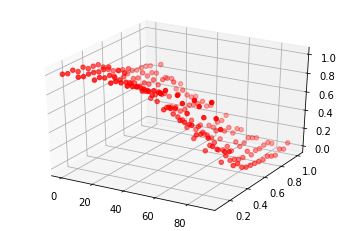

In [45]:
zs

<a list of 6 text.Text objects>

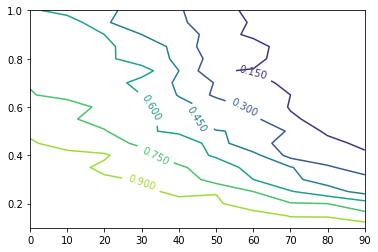

In [6]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)

In [60]:
xs = np.linspace(0,90,100)
ys = np.linspace(0.05,1, 100)
zs = inter(xs, ys)
indx = np.logical_and(zs > 0.65, zs<0.75)
plt.scatter(xs[indx], ys[indx])

/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
/home/zelenyy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


In [14]:
x = theta[indx]
sort_indx  = x.argsort()
x = x[sort_indx]

y = energy[indx][sort_indx]
spl = UnivariateSpline(x, y)
spl.set_smoothing_factor(0.5)

xs = np.linspace(0,90,100)
plt.plot(xs, spl(xs), 'g')


ValueError: x must be strictly increasing

In [22]:
y

array([0.7 , 0.85, 0.8 , 0.75, 0.9 , 0.85, 0.75, 0.7 , 0.95, 0.65, 0.65,
       0.6 , 0.55, 0.7 , 0.45, 0.75, 0.45, 0.4 , 0.35, 0.3 , 0.2 ])